<a href="https://colab.research.google.com/github/SarvAster/GNN-KN-TRANSFORMER/blob/main/karate_club_Node_Embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'networkx.classes.graph.Graph'>
False
[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31), (1, 2), (1, 3), (1, 7), (1, 13), (1, 17), (1, 19), (1, 21), (1, 30), (2, 3), (2, 7), (2, 8), (2, 9), (2, 13), (2, 27), (2, 28), (2, 32), (3, 7), (3, 12), (3, 13), (4, 6), (4, 10), (5, 6), (5, 10), (5, 16), (6, 16), (8, 30), (8, 32), (8, 33), (9, 33), (13, 33), (14, 32), (14, 33), (15, 32), (15, 33), (18, 32), (18, 33), (19, 33), (20, 32), (20, 33), (22, 32), (22, 33), (23, 25), (23, 27), (23, 29), (23, 32), (23, 33), (24, 25), (24, 27), (24, 31), (25, 31), (26, 29), (26, 33), (27, 33), (28, 31), (28, 33), (29, 32), (29, 33), (30, 32), (30, 33), (31, 32), (31, 33), (32, 33)]


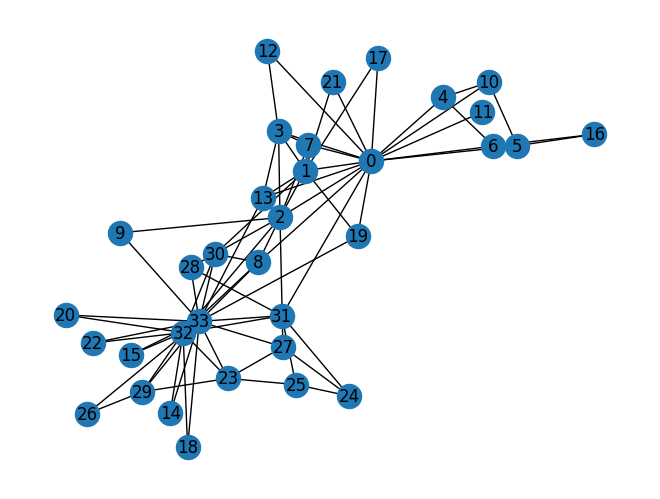

In [ ]:
import networkx as nx
G = nx.karate_club_graph()
print(type(G))
print(G.is_directed())
nx.draw(G, with_labels=True)
print(G.edges())

In [ ]:
def average_degree(num_edges, num_nodes):
  return round(2 * num_edges / num_nodes)

num_edges = G.number_of_edges()
num_nodes = G.number_of_nodes()
avg_degree = average_degree(num_edges, num_nodes)
print("Average degree of karate club network is {}".format(avg_degree))

Average degree of karate club network is 5


In [ ]:
def average_clustering_coefficient(G):
  return round(nx.average_clustering(G), 2)

avg_cluster_coef = average_clustering_coefficient(G)
print("Average clustering coefficient of karate club network is {}".format(avg_cluster_coef))

Average clustering coefficient of karate club network is 0.57


In [ ]:
def one_iter_pagerank(G, beta, r0, node_id):
  l = []
  for node in list(G.neighbors(node_id)) :
    l.append(1/G.degree[node])
  d0 = 1/G.degree[node_id]
  r1 = beta * r0 * sum(l) + (1-beta) * r0

  return round(r1, 2)

beta = 0.8
r0 = 1 / G.number_of_nodes()
node = 0
r1 = one_iter_pagerank(G, beta, r0, node)
print("The PageRank value for node 0 after one iteration is {}".format(r1))

The PageRank value for node 0 after one iteration is 0.13


In [ ]:
def closeness_centrality(G, node=5):
  return nx.closeness_centrality(G, node) / (G.number_of_nodes()-1)

node = 5
closeness = closeness_centrality(G, node=node)
print("The node 5 has closeness centrality {}".format(closeness))

The node 5 has closeness centrality 0.011627906976744186


In [ ]:
import torch
print(torch.__version__)

2.5.1+cu121


In [ ]:
ones = torch.ones(3,4)
zeros = torch.zeros(3,4)
print(ones)
print(zeros)
random_tensor = torch.rand(3,4)
print(random_tensor.shape)
# Create a 3 x 4 tensor with all 32-bit floating point zeros
zeros = torch.zeros(3, 4, dtype=torch.float32)
print(zeros.dtype)

# Change the tensor dtype to 64-bit integer
zeros = zeros.type(torch.long)
print(zeros.dtype)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
torch.Size([3, 4])
torch.float32
torch.int64


In [ ]:
def graph_to_edge_list(G):
  return list(G.edges())

def edge_list_to_tensor(edge_list):
  return torch.tensor(edge_list).t()

pos_edge_list = graph_to_edge_list(G)
pos_edge_index = edge_list_to_tensor(pos_edge_list)
print("The pos_edge_index tensor has shape {}".format(pos_edge_index.shape))
print("The pos_edge_index tensor has sum value {}".format(torch.sum(pos_edge_index)))

The pos_edge_index tensor has shape torch.Size([2, 78])
The pos_edge_index tensor has sum value 2535


In [ ]:
import random

def sample_negative_edges(G, num_neg_samples):
    nodes = list(G.nodes())
    neg_edge_list = set()  # Use a set to prevent duplicates

    while len(neg_edge_list) < num_neg_samples:
        src = random.choice(nodes)
        dst = random.choice(nodes)

        # Check for self-loops and existing edges
        if src != dst and not G.has_edge(src, dst):
            edge = tuple(sorted((src, dst)))  # Ensure undirected edge uniqueness
            neg_edge_list.add(edge)

    return list(neg_edge_list)

# Sample 78 negative edges
neg_edge_list = sample_negative_edges(G, len(pos_edge_list))

# Transform the negative edge list to tensor
neg_edge_index = edge_list_to_tensor(neg_edge_list)
print("The neg_edge_index tensor has shape {}".format(neg_edge_index.shape))

# Which of following edges can be negative ones?
edge_1 = (7, 1)
edge_2 = (1, 33)
edge_3 = (33, 22)
edge_4 = (0, 4)
edge_5 = (4, 2)

def can_be_negative(G, edge):
  return not G.has_edge(edge[0],edge[1])

print(f"Edge 1 can be a negative edge: {can_be_negative(G, edge_1)}")
print(f"Edge 2 can be a negative edge: {can_be_negative(G, edge_2)}")
print(f"Edge 3 can be a negative edge: {can_be_negative(G, edge_3)}")
print(f"Edge 4 can be a negative edge: {can_be_negative(G, edge_4)}")
print(f"Edge 5 can be a negative edge: {can_be_negative(G, edge_5)}")

The neg_edge_index tensor has shape torch.Size([2, 78])
Edge 1 can be a negative edge: False
Edge 2 can be a negative edge: True
Edge 3 can be a negative edge: False
Edge 4 can be a negative edge: False
Edge 5 can be a negative edge: True


In [ ]:
import torch
import torch.nn as nn
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [ ]:
# embedding 4 nodes with 8 features
emb_sample = nn.Embedding(num_embeddings=4,embedding_dim=8)
print('Sample embedding layer: {}'.format(emb_sample))

Sample embedding layer: Embedding(4, 8)


In [ ]:
# Select an embedding in emb_sample
id = torch.LongTensor([1])
print(emb_sample(id))

# Select multiple embeddings
ids = torch.LongTensor([1, 3])
print(emb_sample(ids))

# Get the shape of the embedding weight matrix
shape = emb_sample.weight.data.shape
print(shape)

# Overwrite the weight to tensor with all ones
emb_sample.weight.data = torch.ones(shape)

# Let's check if the emb is indeed initilized
ids = torch.LongTensor([0, 3])
print(emb_sample(ids))

tensor([[-1.7716, -0.0209,  0.5846,  0.6159, -0.4999,  0.0399, -0.7815,  0.3195]],
       grad_fn=<EmbeddingBackward0>)
tensor([[-1.7716, -0.0209,  0.5846,  0.6159, -0.4999,  0.0399, -0.7815,  0.3195],
        [-0.3314, -0.3489,  0.7679, -0.3329, -0.9173,  0.8372,  1.4950, -0.8303]],
       grad_fn=<EmbeddingBackward0>)
torch.Size([4, 8])
tensor([[1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.]], grad_fn=<EmbeddingBackward0>)


In [ ]:
# Please do not change / reset the random seed
torch.manual_seed(1)

def create_node_emb(num_node=34, embedding_dim=16):
  return nn.Embedding(num_node,embedding_dim)

emb = create_node_emb()
ids = torch.LongTensor([0, 3])

# Print the embedding layer
print("Embedding: {}".format(emb))

# An example that gets the embeddings for node 0 and 3
print(emb(ids))

Embedding: Embedding(34, 16)
tensor([[-1.5256, -0.7502, -0.6540, -1.6095, -0.1002, -0.6092, -0.9798, -1.6091,
         -0.7121,  0.3037, -0.7773, -0.2515, -0.2223,  1.6871,  0.2284,  0.4676],
        [-0.9274,  0.5451,  0.0663, -0.4370,  0.7626,  0.4415,  1.1651,  2.0154,
          0.1374,  0.9386, -0.1860, -0.6446,  1.5392, -0.8696, -3.3312, -0.7479]],
       grad_fn=<EmbeddingBackward0>)


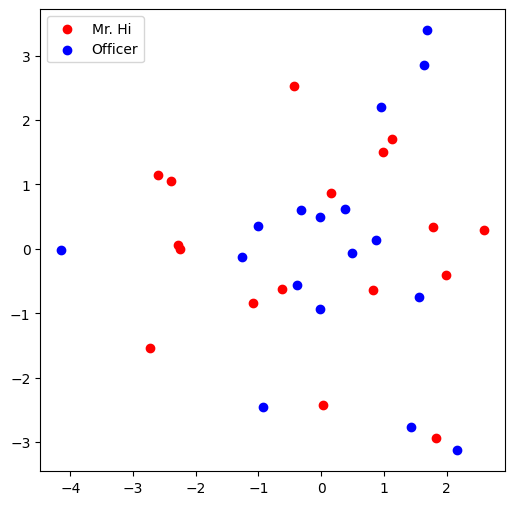

In [ ]:
def visualize_emb(emb):
  X = emb.weight.data.numpy()
  pca = PCA(n_components=2)
  components = pca.fit_transform(X)
  plt.figure(figsize=(6, 6))
  club1_x = []
  club1_y = []
  club2_x = []
  club2_y = []
  for node in G.nodes(data=True):
    if node[1]['club'] == 'Mr. Hi':
      club1_x.append(components[node[0]][0])
      club1_y.append(components[node[0]][1])
    else:
      club2_x.append(components[node[0]][0])
      club2_y.append(components[node[0]][1])
  plt.scatter(club1_x, club1_y, color="red", label="Mr. Hi")
  plt.scatter(club2_x, club2_y, color="blue", label="Officer")
  plt.legend()
  plt.show()

# Visualize the initial random embeddding
visualize_emb(emb)

In [ ]:
print(pos_edge_index)

# Generate the positive and negative labels
pos_label = torch.ones(pos_edge_index.shape[1], )
neg_label = torch.zeros(neg_edge_index.shape[1], )

# Concat positive and negative labels into one tensor
train_label = torch.cat([pos_label, neg_label], dim=0)

# Concat positive and negative edges into one tensor
# Since the network is very small, we do not split the edges into val/test sets
train_edge = torch.cat([pos_edge_index, neg_edge_index], dim=1)
print(train_edge.shape)

tensor([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,
          1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  4,
          4,  5,  5,  5,  6,  8,  8,  8,  9, 13, 14, 14, 15, 15, 18, 18, 19, 20,
         20, 22, 22, 23, 23, 23, 23, 23, 24, 24, 24, 25, 26, 26, 27, 28, 28, 29,
         29, 30, 30, 31, 31, 32],
        [ 1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 17, 19, 21, 31,  2,  3,
          7, 13, 17, 19, 21, 30,  3,  7,  8,  9, 13, 27, 28, 32,  7, 12, 13,  6,
         10,  6, 10, 16, 16, 30, 32, 33, 33, 33, 32, 33, 32, 33, 32, 33, 33, 32,
         33, 32, 33, 25, 27, 29, 32, 33, 25, 27, 31, 31, 29, 33, 33, 31, 33, 32,
         33, 32, 33, 32, 33, 33]])
torch.Size([2, 156])


In [ ]:
from torch.optim import SGD

loss_fn = nn.MSELoss()

def accuracy(pred, label):
  accu = 0
  l = len(pred)
  for i in range(l):
    if abs(pred[i]-label[i]) < 0.5 :
      accu += 1
  return round(accu/l, 4)

def train(emb, loss_fn, train_label, train_edge):

  epochs = 500
  learning_rate = 0.1

  optimizer = SGD(emb.parameters(), lr=learning_rate, momentum=0.9)

  for i in range(epochs):
      u , v = train_edge[0] , train_edge[1]
      dot_product = (emb(u)*emb(v)).sum(dim=1)
      score = torch.sigmoid(dot_product)
      loss = loss_fn(score,train_label)
      loss.backward()
      optimizer.step()
      accu = accuracy(score, train_label)
      if (i + 1) % 10 == 0:
        print(f"i {i + 1}/{epochs}, Loss: {loss.item():.4f}, Accuracy: {accu:.4f}")
  return emb

train(emb, loss_fn, train_label, train_edge)

i 10/500, Loss: 0.3683, Accuracy: 0.5641
i 20/500, Loss: 0.2475, Accuracy: 0.7179
i 30/500, Loss: 0.2005, Accuracy: 0.7756
i 40/500, Loss: 0.2050, Accuracy: 0.7436
i 50/500, Loss: 0.1523, Accuracy: 0.8397
i 60/500, Loss: 0.1452, Accuracy: 0.8269
i 70/500, Loss: 0.1410, Accuracy: 0.8397
i 80/500, Loss: 0.1413, Accuracy: 0.8590
i 90/500, Loss: 0.1385, Accuracy: 0.8526
i 100/500, Loss: 0.1166, Accuracy: 0.8782
i 110/500, Loss: 0.1171, Accuracy: 0.8782
i 120/500, Loss: 0.1344, Accuracy: 0.8654
i 130/500, Loss: 0.1406, Accuracy: 0.8590
i 140/500, Loss: 0.1354, Accuracy: 0.8654
i 150/500, Loss: 0.1414, Accuracy: 0.8590
i 160/500, Loss: 0.1346, Accuracy: 0.8654
i 170/500, Loss: 0.1346, Accuracy: 0.8654
i 180/500, Loss: 0.1282, Accuracy: 0.8718
i 190/500, Loss: 0.1282, Accuracy: 0.8718
i 200/500, Loss: 0.1282, Accuracy: 0.8718
i 210/500, Loss: 0.1219, Accuracy: 0.8782
i 220/500, Loss: 0.1218, Accuracy: 0.8782
i 230/500, Loss: 0.1218, Accuracy: 0.8782
i 240/500, Loss: 0.1218, Accuracy: 0.8782
i

Embedding(34, 16)

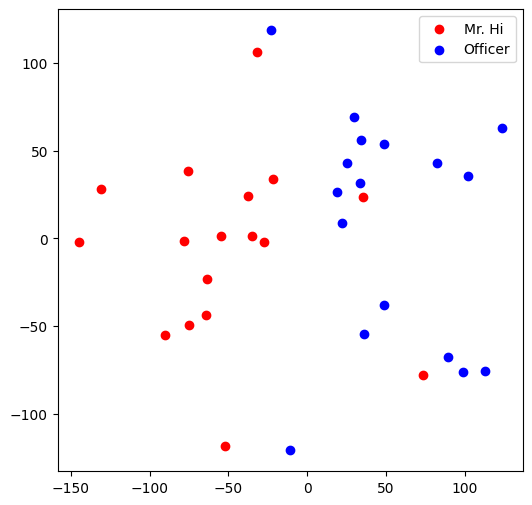

In [ ]:
# Visualize the final learned embedding
visualize_emb(emb)